# Amazon Prime TV Shows and Movies Data Analysis
----
Conducted an end-to-end Exploratory Data Analysis (EDA) project on Amazon Prime Video content using Python. The analysis focused on content distribution, genre popularity, release trends, age certifications, runtime, and key contributors, transforming raw data into meaningful insights for streaming platform analytics.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Loading

In [2]:
title_df = pd.read_csv(r'titles.csv')
credit_df = pd.read_csv(r'credits.csv')

## Show Datasets

In [3]:
title_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
credit_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


## Datasets Exploration 

#### Dataset Rows & Columns count

In [5]:
title_df.shape

(9871, 15)

In [6]:
credit_df.shape

(124235, 5)

#### Dataset Columns

In [7]:
title_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [8]:
credit_df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

#### Dataset Information

In [9]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Summary Statistics

In [11]:
title_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [12]:
credit_df.describe()

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


#### Checking for duplicate values

In [13]:
title_df.duplicated().sum()

np.int64(3)

In [14]:
credit_df.duplicated().sum()

np.int64(56)

#### Missing Values/Null Values

In [15]:
title_df.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [16]:
title_df.isnull().sum().sum()

np.int64(20468)

In [17]:
credit_df.isnull().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [18]:
credit_df.isnull().sum().sum()

np.int64(16287)

#### Check Unique Values

In [19]:
title_df.nunique()

id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

In [20]:
credit_df.nunique()

person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64

## Datasets Cleaning

In [21]:
# Handle Categorical Missing Values
title_df['age_certification'] = title_df['age_certification'].fillna('Not Rated')
credit_df['character'] = credit_df['character'].fillna('Unknown')

In [22]:
# Handle Numerical Missing Values (Using Median for robustness)
title_df['imdb_score'] = title_df['imdb_score'].fillna(title_df['imdb_score'].median())
title_df['tmdb_score'] = title_df['tmdb_score'].fillna(title_df['tmdb_score'].median())

In [23]:
title_df['seasons'] = title_df['seasons'].fillna(0)

In [24]:
# Remove Duplicates
title_df.drop_duplicates(inplace=True)
credit_df.drop_duplicates(inplace=True)

## Datasets Merging

In [25]:
merged_df = title_df.merge(credit_df, on='id', how='left')

In [26]:
merged_df.shape

(125186, 19)

## Data Preprocessing

In [27]:
#Creating a column for decade
title_df['decade'] = (title_df['release_year'] // 10) * 10

In [28]:
#Categorize runtime 

merged_df['runtime_category'] = ''
for i in range(len(merged_df)):
    if merged_df.loc[i, 'runtime'] < 30:
        merged_df.loc[i, 'runtime_category'] = 'Short'
    elif merged_df.loc[i, 'runtime'] <= 90:
        merged_df.loc[i, 'runtime_category'] = 'Medium'
    else:
        merged_df.loc[i, 'runtime_category'] = 'Long'

In [29]:
merged_df['runtime_category'].tail()

125181    Medium
125182    Medium
125183    Medium
125184    Medium
125185     Short
Name: runtime_category, dtype: object

In [30]:
#Add column is_movie (1 if movie, 0 if show)

merged_df['is_movie'] = 0
for i in range(len(merged_df)):
    if merged_df.loc[i, 'type'] == 'MOVIE':
        merged_df.loc[i, 'is_movie'] = 1
    else:
        merged_df.loc[i, 'is_movie'] = 0

In [31]:
merged_df['is_movie'].head()

0    0
1    0
2    0
3    1
4    1
Name: is_movie, dtype: int64

In [32]:
#Categorize IMDb ratings

merged_df['rating_category'] = ''
for i in range(len(merged_df)):
    score = merged_df.loc[i, 'imdb_score']
    if pd.isna(score):
        merged_df.loc[i, 'rating_category'] = 'Not Rated'
    elif score < 5:
        merged_df.loc[i, 'rating_category'] = 'Poor'
    elif score < 7:
        merged_df.loc[i, 'rating_category'] = 'Average'
    elif score < 8.5:
        merged_df.loc[i, 'rating_category'] = 'Good'
    else:
        merged_df.loc[i, 'rating_category'] = 'Excellent'


## KPIs ( Key Performance Indicators) 

In [33]:
total_titles = merged_df.shape[0]
total_movies = merged_df[merged_df['type'] == 'MOVIE'].shape[0]
total_shows = merged_df[merged_df['type'] == 'SHOW'].shape[0]
avg_runtime = merged_df['runtime'].mean()
avg_imdb = merged_df['imdb_score'].mean()
oldest_year = merged_df['release_year'].min()
newest_year = merged_df['release_year'].max()

print("Total Titles:", total_titles)
print("Movies:", total_movies)
print("Shows:", total_shows)
print("Average Runtime:", round(avg_runtime, 2))
print("Average IMDb Score:", round(avg_imdb, 2))
print("Release Years Range:", oldest_year, "-", newest_year)

Total Titles: 125186
Movies: 116685
Shows: 8501
Average Runtime: 95.35
Average IMDb Score: 5.98
Release Years Range: 1912 - 2022


In [34]:
# Top 10 genres
genres = merged_df['genres'].dropna()
genres = genres.str.replace("[", "").str.replace("]", "").str.replace("'", "")
genres = genres.str.split(",").explode()

top_10_geners = genres.str.strip().value_counts().head(10)

print(top_10_geners)

genres
drama       70006
comedy      41493
thriller    33079
action      30400
romance     28633
crime       20618
horror      14142
european    12548
scifi       11442
fantasy      8935
Name: count, dtype: int64


In [35]:
# Average IMDb and TMDB
avg_imdb = merged_df['imdb_score'].mean()
avg_tmdb = merged_df['tmdb_score'].mean()

print("Average IMDb:", round(avg_imdb,2), "\nAverage TMDB:", round(avg_tmdb,2))

Average IMDb: 5.98 
Average TMDB: 5.99


In [36]:
# Top 10 highest rated
top_rated = merged_df.sort_values('imdb_score', ascending=False).head(10)
print(top_rated[['title', 'imdb_score']])

             title  imdb_score
119807  Pawankhind         9.9
119812  Pawankhind         9.9
119808  Pawankhind         9.9
119814  Pawankhind         9.9
119813  Pawankhind         9.9
119798  Pawankhind         9.9
119799  Pawankhind         9.9
119815  Pawankhind         9.9
119797  Pawankhind         9.9
119800  Pawankhind         9.9


In [37]:
# Correlation between IMDb and TMDB
correlation = merged_df['imdb_score'].corr(merged_df['tmdb_score'])
print("Correlation IMDb vs TMDB:", round(correlation,2))

Correlation IMDb vs TMDB: 0.59


In [38]:
# Top Actors
top_actors = merged_df[merged_df['role'] == 'ACTOR']['name'].value_counts().head(10)
top_actors

name
George 'Gabby' Hayes    49
Roy Rogers              45
Bess Flowers            44
Gene Autry              40
Nassar                  37
Herman Hack             35
Charles King            35
George Morrell          34
Earl Dwire              34
Forrest Taylor          34
Name: count, dtype: int64

In [39]:
# Top Directors
top_directors = merged_df[merged_df['role'] == 'DIRECTOR']['name'].value_counts().head(10)
top_directors

name
Joseph Kane           41
Sam Newfield          38
Jay Chapman           34
Lesley Selander       22
John English          21
Harry L. Fraser       21
William Nigh          20
Manny Rodriguez       17
Robert N. Bradbury    17
George Archainbaud    16
Name: count, dtype: int64

In [40]:
# Top 10 popular titles
top_popular = merged_df.sort_values('tmdb_popularity', ascending=False).head(10)
print(top_popular[['title', 'tmdb_popularity']])

                     title  tmdb_popularity
116570  All the Old Knives         1437.906
116569  All the Old Knives         1437.906
116568  All the Old Knives         1437.906
116567  All the Old Knives         1437.906
116566  All the Old Knives         1437.906
116565  All the Old Knives         1437.906
116564  All the Old Knives         1437.906
116586  All the Old Knives         1437.906
116585  All the Old Knives         1437.906
116584  All the Old Knives         1437.906


## Data Vizualization

#### Movies Vs TV Shows Count

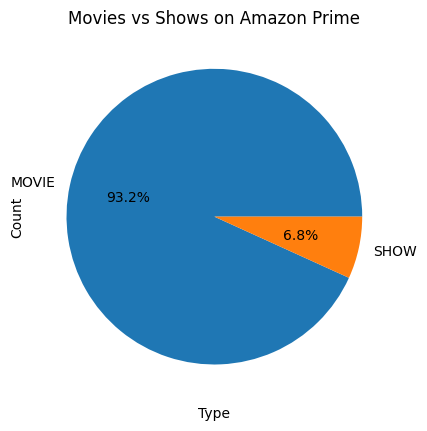

In [41]:
merged_df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',)
plt.title('Movies vs Shows on Amazon Prime')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#### Releases by Year

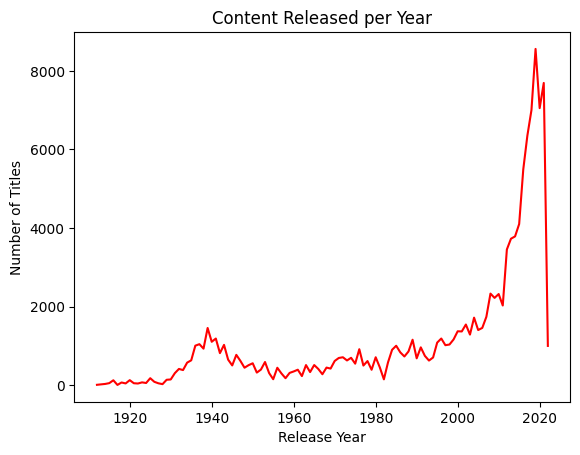

In [42]:
merged_df['release_year'].value_counts().sort_index().plot(kind='line', color='red')
plt.title('Content Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

#### Runtime Distribution

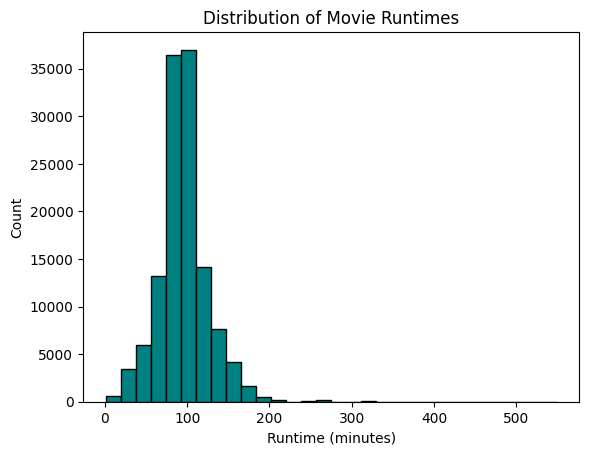

In [43]:
plt.hist(merged_df['runtime'].dropna(), bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

#### IMDb Score Distribution

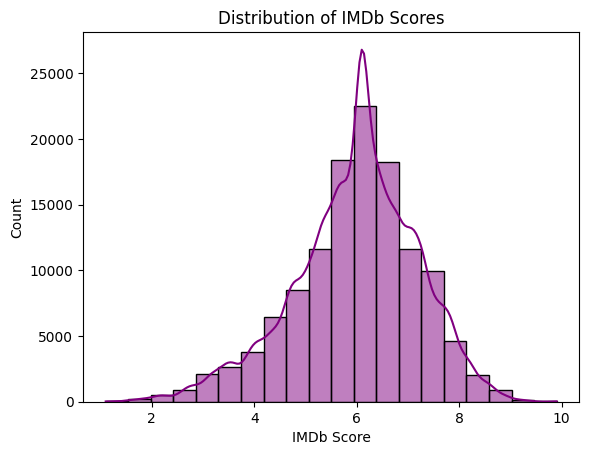

In [44]:
sns.histplot(merged_df['imdb_score'], bins=20, kde=True, color='purple')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.show()

### Top 10 Genres

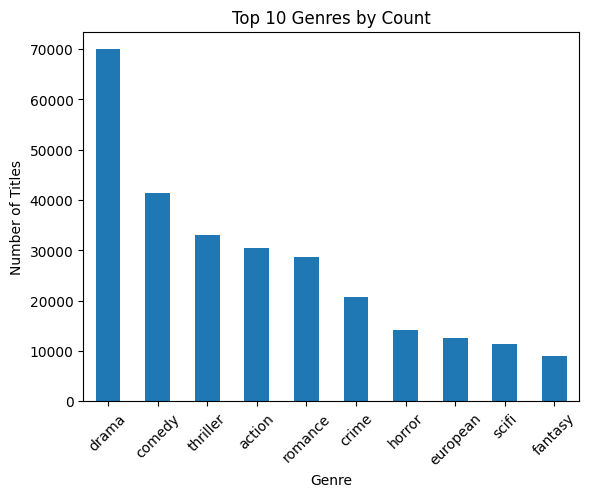

In [45]:
top_10_geners.plot(kind='bar')
plt.title('Top 10 Genres by Count')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

#### Top 10 Actors

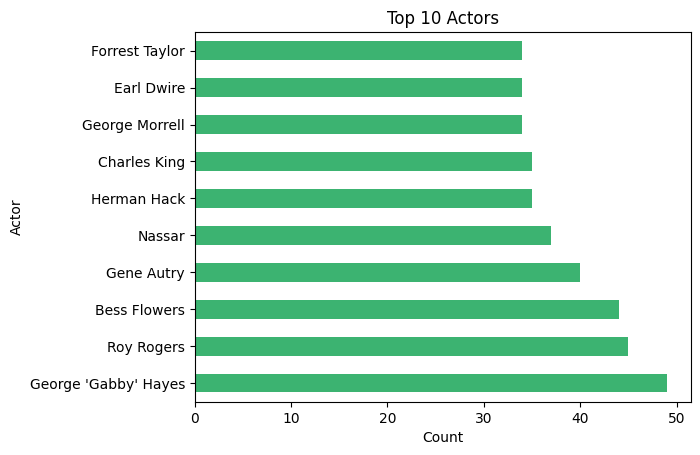

In [46]:

top_actors.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

#### Top 10 Directors

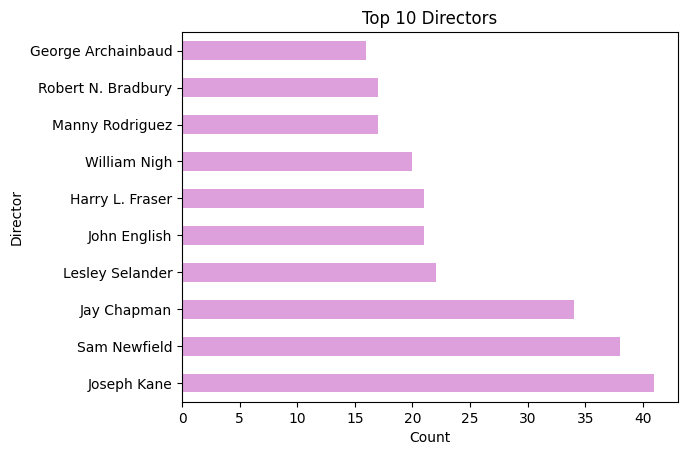

In [47]:
top_directors.plot(kind='barh', color='plum')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


#### Certification Distribution

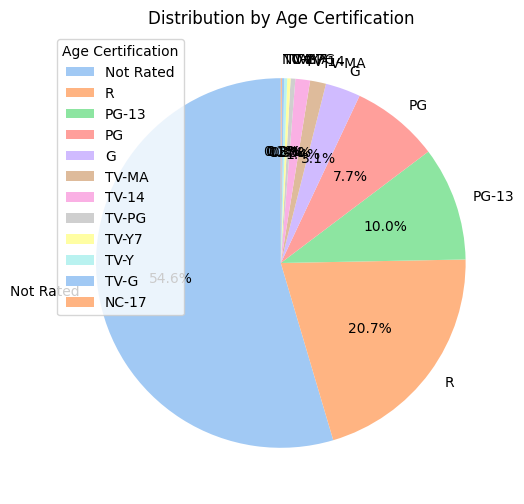

In [48]:
plt.figure(figsize=(12,6))
merged_df['age_certification'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.legend(title='Age Certification', loc='best')
plt.title('Distribution by Age Certification')
plt.ylabel('')
plt.show()
     

#### Total Releases per Year

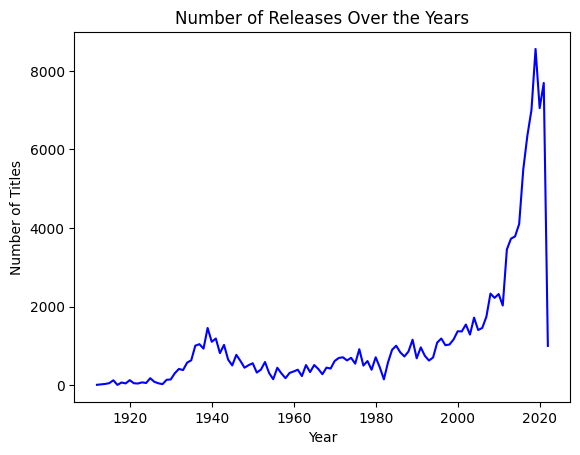

In [49]:
merged_df['release_year'].value_counts().sort_index().plot(kind='line', color='blue')
plt.title('Number of Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

#### IMDb vs TMDB Correlation Scatterplot

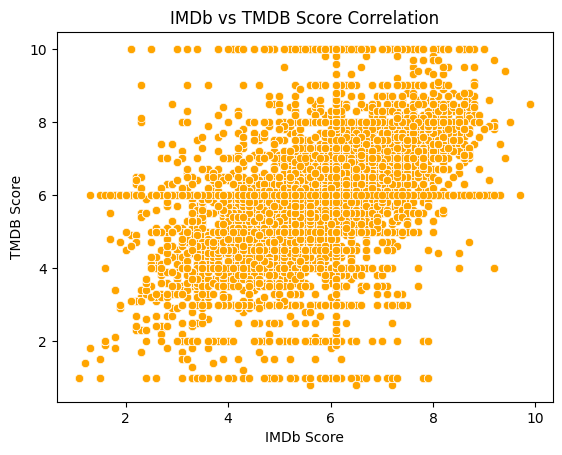

In [50]:
sns.scatterplot(data=merged_df, x='imdb_score', y='tmdb_score', color='orange')
plt.title('IMDb vs TMDB Score Correlation')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.show()

#### Runtime Trend Over Years

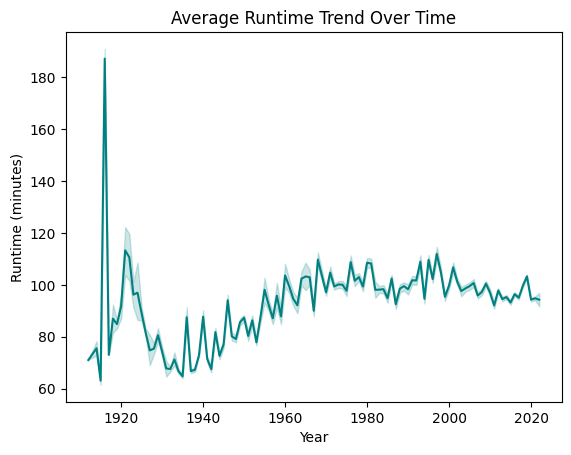

In [51]:
sns.lineplot(data=merged_df, x='release_year', y='runtime', color='teal')
plt.title('Average Runtime Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.show()

#### Popularity vs IMDb Scatterplot

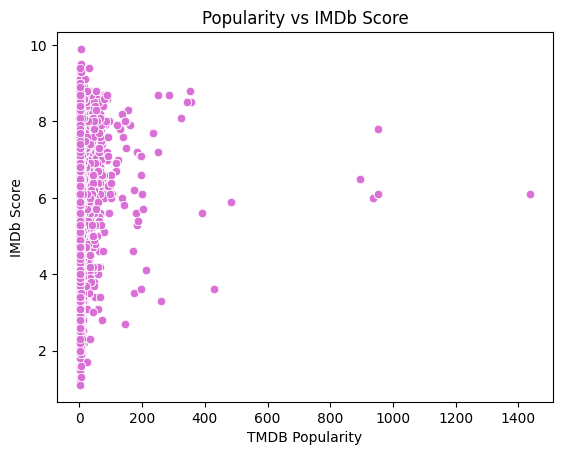

In [52]:
sns.scatterplot(data=merged_df, x='tmdb_popularity', y='imdb_score', color='orchid')
plt.title('Popularity vs IMDb Score')
plt.xlabel('TMDB Popularity')
plt.ylabel('IMDb Score')
plt.show()